<a href="https://colab.research.google.com/github/krutarth-dev/Python-9/blob/main/Car_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data_url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(data_url)

# Get all cars and their types that do not qualify for clean alternative fuel vehicle
non_clean_cars = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Clean Alternative Fuel Vehicle Eligible']
non_clean_cars = non_clean_cars[['Make', 'Model']]
print("Cars and their models that do not qualify for clean alternative fuel vehicle:")
print(non_clean_cars)

# Get all TESLA cars with the model year and model type made in Bothell City
tesla_cars_bothell = df[(df['Make'] == 'TESLA') & (df['City'] == 'Bothell')]
tesla_cars_bothell = tesla_cars_bothell[['Model Year', 'Model']]
print("TESLA cars with the model year and model type made in Bothell City:")
print(tesla_cars_bothell)

# Get all cars that have an electric range of more than 100 and were made after 2015
electric_cars = df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)]
electric_cars = electric_cars[['Make', 'Model Year', 'Electric Range']]
print("Cars with an electric range of more than 100 and made after 2015:")
print(electric_cars)


Cars and their models that do not qualify for clean alternative fuel vehicle:
          Make    Model
6         FORD   FUSION
7         AUDI     Q5 E
8         FORD    C-MAX
11       TESLA  MODEL Y
14        FORD    C-MAX
...        ...      ...
130437     BMW     530E
130438   TESLA  MODEL Y
130439  NISSAN     LEAF
130440   TESLA  MODEL Y
130442   TESLA  MODEL 3

[69892 rows x 2 columns]
TESLA cars with the model year and model type made in Bothell City:
        Model Year    Model
39            2020  MODEL 3
217           2022  MODEL 3
218           2022  MODEL Y
222           2018  MODEL 3
292           2017  MODEL X
...            ...      ...
129778        2019  MODEL 3
129954        2021  MODEL 3
129976        2014  MODEL S
130295        2022  MODEL 3
130392        2018  MODEL 3

[2407 rows x 2 columns]
Cars with an electric range of more than 100 and made after 2015:
          Make  Model Year  Electric Range
0        TESLA        2018             238
2        TESLA        2019 

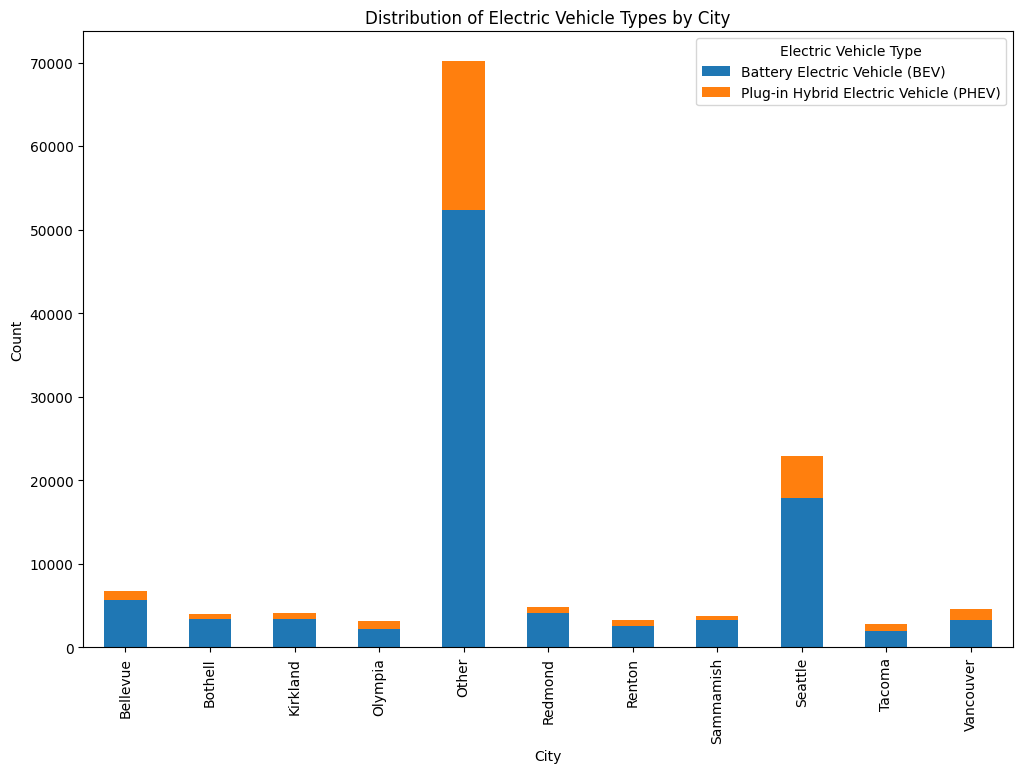

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set plot size to full screen
mpl.rcParams['figure.figsize'] = (12, 8)

# Read the data from the CSV file
data_url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(data_url)

# Get the top N cities with the highest counts
top_n = 10
top_cities = df['City'].value_counts().nlargest(top_n).index.tolist()

# Group cities other than the top N into an "Other" category
df['City'] = df['City'].apply(lambda x: x if x in top_cities else 'Other')

# Get the counts of city and electric vehicle type
city_ev_type_counts = df.groupby(['City', 'Electric Vehicle Type']).size().unstack().fillna(0)

# Plot the distribution between city and electric vehicle type as a stacked bar chart
city_ev_type_counts.plot(kind='bar', stacked=True)

# Set plot title and labels
plt.title('Distribution of Electric Vehicle Types by City')
plt.xlabel('City')
plt.ylabel('Count')

# Show the plot
plt.show()
